# Telecom Company Churn Prediction
### This company provides some services to its customers, some customers have left, and we are here to analyze the case and figure out the reasons behind thier churn using the provided features. From this, we will be able to predict if a customer will churn or not.

## Overview:
- **Churn:** Customers who left within the last month

- **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- **Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- **Demographic info about customers** – gender, age range, and if they have partners and dependents

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

## Step 1: Data Exploration
To see what is contained in the dataset.

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Step 2: Data Preprocessing
To clean and process the data into the required format.

In [7]:
#Checking for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#Checking for duplicates in the data
df.duplicated().sum()

0

In [9]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [10]:
#Converting the values for SeniorCitizen
df["SeniorCitizen"] = df["SeniorCitizen"].replace(1,"yes")
df["SeniorCitizen"] = df["SeniorCitizen"].replace(0,"no")

In [11]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
#Correcting the data type for Total Charges
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [13]:
df["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [14]:
df["TotalCharges"].isnull().sum()

11

In [15]:
#Some of the data was lost but we shall drop this since its less compared to the rest (7043 rows)
df.dropna(subset=["TotalCharges"], inplace=True)
df["TotalCharges"].isnull().sum()

0

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

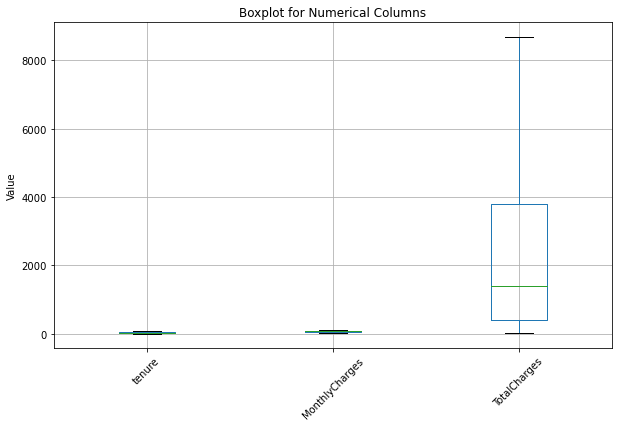

In [17]:
#Checking for Outliers
import matplotlib.pyplot as plt

cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create a boxplot for each column
plt.figure(figsize=(10, 6))
df[cols].boxplot()
plt.title('Boxplot for Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')


In [19]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encoded dataset
print(df_encoded.head())

   tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0       1           29.85         29.85                      0   
1      34           56.95       1889.50                      0   
2       2           53.85        108.15                      0   
3      45           42.30       1840.75                      0   
4       2           70.70        151.65                      0   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  ...  \
0                      0                      0                      0  ...   


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print(df_encoded.head())

     tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0 -1.280248       -1.161694     -0.994194                      0   
1  0.064303       -0.260878     -0.173740                      0   
2 -1.239504       -0.363923     -0.959649                      0   
3  0.512486       -0.747850     -0.195248                      0   
4 -1.239504        0.196178     -0.940457                      0   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  ...  \
0                      0                      0                    

## Step 3: Feature engineering
In this step, we will transform existing features or create new ones that might be useful for predicting churn.

In [21]:
# Create a derived feature representing the ratio of total charges to tenure
df_encoded['Charges_Per_Month'] = df_encoded['TotalCharges'] / df_encoded['tenure']

# Interaction feature between internet service and online security
df_encoded['InternetService_Security'] = df_encoded['InternetService_Fiber optic'] * df_encoded['OnlineSecurity_Yes']

## Step 4: Splitting the Data
Splitting the dataset into training and testing sets.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:

# Separate features (X) and target variable (y)
X = df_encoded.drop('Churn_Yes', axis=1)  # Features (all columns except the target variable)
y = df_encoded['Churn_Yes']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5625, 7063) (5625,)
Testing set shape: (1407, 7063) (1407,)


## Step 5: Model Selection & Training

**The problem at hand contains labeled data, which means we will use supervised learning. Under supervised learning, we have classfication and regression algorithms under which we shall use logistic regression and random forest and then pick the better performing algorithm.**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [31]:
# Initializing logistic regression
logistic_regression = LogisticRegression(max_iter=10000)

# Training
logistic_regression.fit(X_train, y_train)

# Making predictions
y_pred_log = logistic_regression.predict(X_test)

In [32]:
#Initializing random forest classifier
random_forest = RandomForestClassifier()

# Training
random_forest.fit(X_train, y_train)

#Making predictions
y_pred_rf = random_forest.predict(X_test)

In [33]:
# Evaluate performance
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1033
           1       0.66      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407

